In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

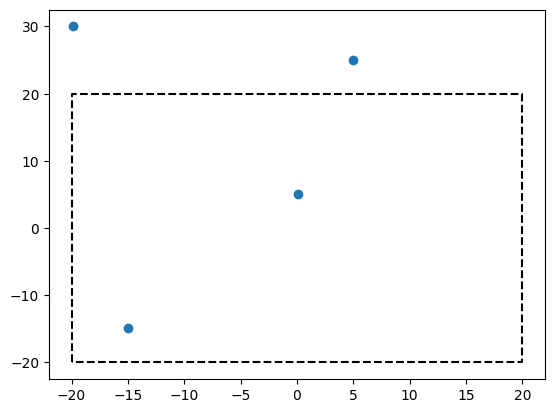

In [23]:
data = np.loadtxt('data.csv', delimiter=',')[:,:-1]


limits = np.array([[-20, -20], [-20,20], [20,20], [20,-20], [-20,-20]])

plt.scatter(data[-1,::2], data[-1,1::2])

plt.plot(limits[:,0], limits[:,1], 'k--')


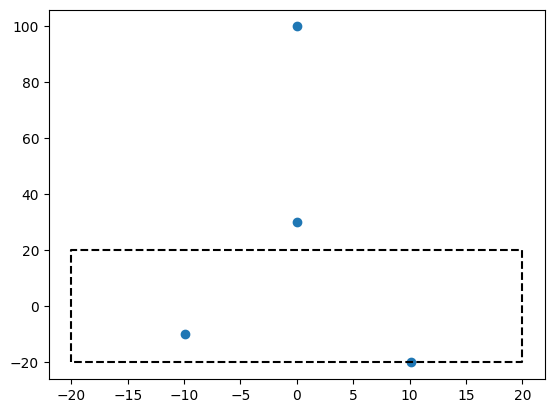

In [22]:
data = np.loadtxt('data.csv', delimiter=',')[:,:-1]


limits = np.array([[-20, -20], [-20,20], [20,20], [20,-20], [-20,-20]])

plt.scatter(data[-1,::2], data[-1,1::2])


plt.plot(limits[:,0], limits[:,1], 'k--')

In [3]:
# General regression function, can be applied anywhere pretty much
def regression(x, y, expected):
    popt, pcov = curve_fit(expected, xdata = x, ydata = y)
    reg = expected(x, popt[0], popt[1])
    perr = np.sqrt(np.diag(pcov))
    R2 = 1-((np.sum((expected(x, popt[0], popt[1])-y)**2))/(np.var(y)*y.shape[0]))

    return reg, popt, perr, R2

0.9965778567701591
101.23898942457815 496693.18477963767


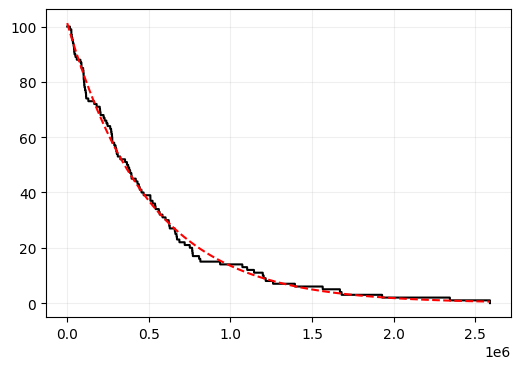

In [7]:
def exp(x, a, tau):
    return a*np.exp(-x/tau)

data = np.loadtxt('data.dat', delimiter=',')
time = np.arange(len(data))

# slope, intercept, r_value, p_value, std_err = linregress(time, data)
# teorica_y = intercept + slope * time
# print(r_value**2)

fig, ax = plt.subplots(figsize=(6,4))
plt.plot(time, data, 'k')

# Regression parameters
reg, popt, perr, R2 = regression(time, data, exp)

plt.plot(time, reg, 'r--')

plt.grid(alpha=.2)

print(R2)
print(popt[0], popt[1])